# Data Exploration Seasonality

Alex Peed, Kunal Shah, Willie Jin, Sam Lam

In [9]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import seaborn as sb
import numpy as np
%matplotlib inline

## Overall Goal:

The goal of the seasonality analysis is to flush out the model that we used for predicting AirBnB pricing. Prices obviously change over time, so this added level of specificity makes the model that much more usable. Obviously, this is a problem that AirBnB has been actively trying to incorporate into their pricing analysis. While we did seem a high level of predictive power for our model, to be able to generalize it to an entire year instead of one snapshot at a specific date is obviously very important. Also, we are hoping with the seasonal nature of the data, utilizing such analysis will help decrease the residuals of our predictors by allowing for more detailed predictions based on more factors. 

In [4]:
#Importing Datafile and converting to numbers
data = pd.read_csv('../datasets/calendar_clean.csv')
data['new price']=data['new price'].str.lstrip('$').astype(float)

In [18]:
data.head(5)

,listing_id,date,available,new price
0,3604481.0,1/1/2015,t,600.0
1,3604481.0,1/2/2015,t,600.0
2,3604481.0,1/3/2015,t,600.0
3,3604481.0,1/4/2015,t,600.0
4,3604481.0,1/5/2015,t,600.0


In [20]:
data['date']=pd.to_datetime(data['date'])

In [37]:
data['weekday'] = pd.Series(data.date).dt.dayofweek

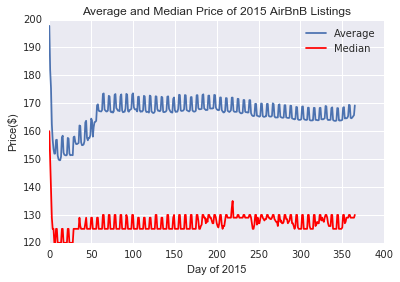

In [23]:
#Taking average/median values as well as plotting
date=[]
avg_price=[]
median_price=[]
for i in data['date'].unique():
    date.append(i)
    avg_price.append(data[data['date'] == i]['new price'].mean())
    median_price.append(data[data['date'] == i]['new price'].median())
plt.plot(range(len(avg_price)), avg_price, label= "Average")
plt.plot(range(len(avg_price)),median_price,color='red', label = "Median")
plt.ylabel('Price($)')
plt.xlabel('Day of 2015')
plt.title('Average and Median Price of 2015 AirBnB Listings')
plt.legend()

Here we see very interesting trends that occur. Overall, it seems like the trends are very cyclical in nature-- most clearly from a weekly perspective. We then look at a trend of the first 4 weeks of 2015 to get a better idea of whether the cycles are indeed weekly. Secondly, it is worth noting that besides the first day or two where the price is extremely high(perhaps this has to do with New Years), the only only time we see a notable trend in prices, other than the obvious cyclicality, is a depression in the general prices in the first two months or so. Thus in order of priority, we analyze seasonality based on the day of the weeks, important holidays, and then months.

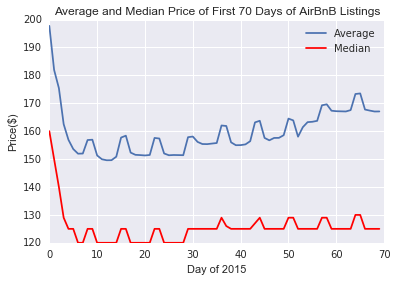

In [26]:
plt.plot(range(len(avg_price[0:70])), avg_price[0:70], label= "Average")
plt.plot(range(len(avg_price[0:70])),median_price[0:70],color='red', label = "Median")
plt.ylabel('Price($)')
plt.xlabel('Day of 2015')
plt.title('Average and Median Price of First 70 Days of AirBnB Listings')
plt.legend()

Here, we can clearly see the weekly cyclicality trends of the data. Clearly there are peaks around once every 7 days: 7, 14, 21, etc. Thus, we will look at days of the week first.

In [36]:
data['date'].apply(datetime.weekday())

NameError: name 'datetime' is not defined

In [87]:
daily_avg_price=[]
daily_median_price=[]
b=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
for i in range(7):
    daily_avg_price.append(data[data['weekday'] == i]['new price'].mean())
    daily_median_price.append(data[data['weekday'] == i]['new price'].median())

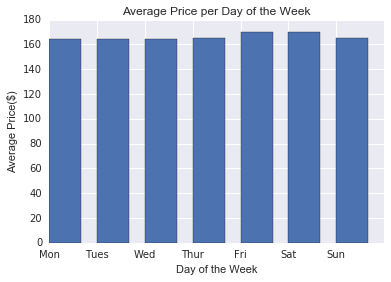

In [80]:
plt.bar(range(len(daily_avg_price)),daily_avg_price,1/1.5)
plt.xticks(range(len(daily_avg_price)),b)
plt.ylabel('Average Price($)')
plt.xlabel('Day of the Week')
plt.title('Average Price per Day of the Week')

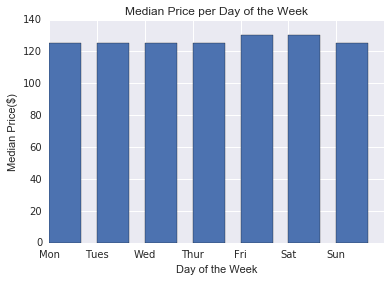

In [81]:
plt.bar(range(len(daily_avg_price)),daily_median_price,1/1.5)
plt.xticks(range(len(daily_avg_price)),b)
plt.ylabel('Median Price($)')
plt.xlabel('Day of the Week')
plt.title('Median Price per Day of the Week')

In [83]:
multiplier = []
for i in range(7):
    multiplier.append(daily_avg_price[i]/daily_avg_price[0])

In [84]:
multiplier

[1.0,
 0.999677044441654,
 0.999581906843472,
 1.001452750623622,
 1.0314801624309469,
 1.031393687509484,
 1.0023139513392798]

In [110]:
pricing_data=dict.fromkeys(b)

In [111]:
for i in pricing_data:
    pricing_data[i]=[]

In [98]:
for index,j in enumerate(b):
        pricing_data[j].append(1)

AttributeError: 'NoneType' object has no attribute 'append'

In [112]:
## Alternate version where 
listing_id=[]

for i in data['listing_id'].unique():
    listing_id.append(i)
    for index,j in enumerate(b):
        pricing_data[j].append(data[(data['weekday'] == index) & (data['listing_id'] == i)]['new price'].mean())
        

In [138]:
results = pd.DataFrame(pricing_data)
results['listing_id'] = listing_id
results_nona = results.dropna(axis = 0)
results_nona = results_nona[['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'listing_id']]

In [151]:
for i in b[1:7]:
    results_nona[i] = results_nona[i]/results_nona['Mon']
results_nona['Mon']= 1

In [160]:
results_nona['Sun'].mean()

1.0009269127770262